In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

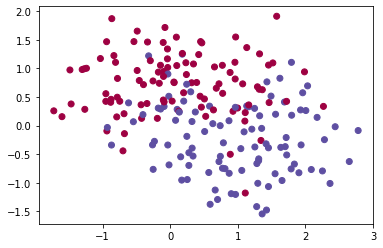

In [ ]:
# Generate dataset
np.random.seed(3)
X, y = sklearn.datasets.make_moons(200, True, noise=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [ ]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# caculate distances between one test data xtest and all data points in X_train
def calculate_distances(X_train, xtest):
  distances = []
  for i in X_train.index:
    # calculate distance beteen Xtest and Xi
      xi = X_train.loc[i]
      distance = np.sqrt((xi[0] - xtest[0])**2 + (xi[1] - xtest[1])**2) 
      distances.append((distance))
  return pd.DataFrame(data=distances, index=X_train.index, columns=['dist'])

import heapq
def knearest(df_distances, k):

  res = [(-df_distances.loc[i][0], i)  for i in df_distances.index[:k]]
  heapq.heapify(res)

  for i in df_distances.index[k:]:
    if df_distances.loc[i][0] < -res[0][0]:
      heapq.heappop(res)
      heapq.heappush(res, (-df_distances.loc[i][0], i))
  return [(-elem, i) for (elem, i) in res]

from collections import Counter
def predict_xtest(X_train, y_train, xtest, k):
  distances = calculate_distances(X_train, xtest)
  topk = knearest(distances, k)
  
  indices = []
  for i in range(len(topk)):
    indices.append(topk[i][1])

  count = Counter(y_train.loc[indices][0])
  return count.most_common()[0][0]

In [ ]:
def knn_classifier(X_train, X_test, y_train, y_test, k):
  yhat = []
  for i in X_test.index:
    xtest = X_test.loc[i]
    ytest = predict_xtest(X_train, y_train, xtest, k)
    yhat.append(ytest)
  return yhat

In [ ]:
ypred = knn_classifier(X_train, X_test, y_train, y_test, k=5)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, ypred))

0.725


In [ ]:
# verify using sklearn knn api
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
ypred2 = clf.predict(X_test)
print(accuracy_score(y_test, ypred2))

0.725


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
